In [1]:
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np

In [2]:
sui_state = "suicide_rate_state.csv"
sui_state_df = pd.read_csv(sui_state)

In [3]:
gdp_state = "states_2018_gdp.csv"
gdp_state_df = pd.read_csv(gdp_state)

In [4]:
gdp_state1 = "bea-gdp-by-state.csv"
gdp_state1_df = pd.read_csv(gdp_state1)

In [5]:
sui_state_df.head()

,Unnamed: 0,State,Year,Deaths,Population,Crude Rate
0,NaN,Alabama,1999,554,4430141,12.5
1,NaN,Alabama,2000,582,4447100,13.1
2,NaN,Alabama,2001,512,4467634,11.5
3,NaN,Alabama,2002,513,4480089,11.5
4,NaN,Alabama,2003,520,4503491,11.5


In [6]:
gdp_state_df.head()

,State,Gross Domestic Product ($ Millions),Gross Domestic Product per Capita ($ Dollars)
0,Alabama,221736,40598
1,Alaska,54734,71996
2,Arizona,348297,43464
3,Arkansas,128419,38919
4,California,2997733,68803


In [7]:
gdp_state1_df.head()

,Fips,Area,2013,2014,2015,2016,2017
0,0,United States,48534,49329,50301,50660,51337
1,1000,Alabama,36674,36473,36818,37158,37508
2,2000,Alaska,69711,67179,65971,63304,63610
3,4000,Arizona,38352,38534,38787,38940,39583
4,5000,Arkansas,35888,36265,36295,36502,36714


In [8]:
gdp_state1_df = gdp_state1_df.drop(columns = "Fips")
gdp_state1_df.head()

,Area,2013,2014,2015,2016,2017
0,United States,48534,49329,50301,50660,51337
1,Alabama,36674,36473,36818,37158,37508
2,Alaska,69711,67179,65971,63304,63610
3,Arizona,38352,38534,38787,38940,39583
4,Arkansas,35888,36265,36295,36502,36714


In [10]:
gdp_state1_df = gdp_state1_df.rename(columns = {"Area": "State"})
gdp_state1_df.head()

,State,2013,2014,2015,2016,2017
0,United States,48534,49329,50301,50660,51337
1,Alabama,36674,36473,36818,37158,37508
2,Alaska,69711,67179,65971,63304,63610
3,Arizona,38352,38534,38787,38940,39583
4,Arkansas,35888,36265,36295,36502,36714


In [11]:
gdp_state1_df = gdp_state1_df.drop([0])
gdp_state1_df.head()

,State,2013,2014,2015,2016,2017
1,Alabama,36674,36473,36818,37158,37508
2,Alaska,69711,67179,65971,63304,63610
3,Arizona,38352,38534,38787,38940,39583
4,Arkansas,35888,36265,36295,36502,36714
5,California,53838,55571,57637,58974,60359


In [13]:
gdp_merge = pd.merge(gdp_state_df, gdp_state1_df, on = ["State"])
gdp_merge.head()

,State,Gross Domestic Product ($ Millions),Gross Domestic Product per Capita ($ Dollars),2013,2014,2015,2016,2017
0,Alabama,221736,40598,36674,36473,36818,37158,37508
1,Alaska,54734,71996,69711,67179,65971,63304,63610
2,Arizona,348297,43464,38352,38534,38787,38940,39583
3,Arkansas,128419,38919,35888,36265,36295,36502,36714
4,California,2997733,68803,53838,55571,57637,58974,60359


In [14]:
gdp_merge = gdp_merge.drop(columns = "Gross Domestic Product ($ Millions)")
gdp_merge.head()

,State,Gross Domestic Product per Capita ($ Dollars),2013,2014,2015,2016,2017
0,Alabama,40598,36674,36473,36818,37158,37508
1,Alaska,71996,69711,67179,65971,63304,63610
2,Arizona,43464,38352,38534,38787,38940,39583
3,Arkansas,38919,35888,36265,36295,36502,36714
4,California,68803,53838,55571,57637,58974,60359


In [15]:
gdp_merge = gdp_merge.rename(columns = {"Gross Domestic Product per Capita ($ Dollars)": "2018"})
gdp_merge = gdp_merge[['State', '2013', '2014', '2015', '2016', '2017', '2018']]
gdp_merge.head()

,State,2013,2014,2015,2016,2017,2018
0,Alabama,36674,36473,36818,37158,37508,40598
1,Alaska,69711,67179,65971,63304,63610,71996
2,Arizona,38352,38534,38787,38940,39583,43464
3,Arkansas,35888,36265,36295,36502,36714,38919
4,California,53838,55571,57637,58974,60359,68803


In [16]:
gdp_merge_df = gdp_merge
gdp_merge_df.head()

,State,2013,2014,2015,2016,2017,2018
0,Alabama,36674,36473,36818,37158,37508,40598
1,Alaska,69711,67179,65971,63304,63610,71996
2,Arizona,38352,38534,38787,38940,39583,43464
3,Arkansas,35888,36265,36295,36502,36714,38919
4,California,53838,55571,57637,58974,60359,68803


In [17]:
merge_sui_gdp_df = pd.merge(sui_state_df, gdp_merge_df, on = ["State"])
merge_sui_gdp_df = merge_sui_gdp_df.drop(columns = "Unnamed: 0")
merge_sui_gdp_df = merge_sui_gdp_df.sort_values(["State", "Year"], ascending = True)
merge_sui_gdp_df

,State,Year,Deaths,Population,Crude Rate,2013,2014,2015,2016,2017,2018
0,Alabama,1999,554,4430141,12.5,36674,36473,36818,37158,37508,40598
1,Alabama,2000,582,4447100,13.1,36674,36473,36818,37158,37508,40598
2,Alabama,2001,512,4467634,11.5,36674,36473,36818,37158,37508,40598
3,Alabama,2002,513,4480089,11.5,36674,36473,36818,37158,37508,40598
4,Alabama,2003,520,4503491,11.5,36674,36473,36818,37158,37508,40598
...,...,...,...,...,...,...,...,...,...,...,...
1095,Wyoming,2016,144,585501,24.6,60806,60853,61304,59327,61091,65843
1096,Wyoming,2017,157,579315,27.1,60806,60853,61304,59327,61091,65843
1097,Wyoming,2018,147,577737,25.4,60806,60853,61304,59327,61091,65843
1098,Wyoming,2019,170,578759,29.4,60806,60853,61304,59327,61091,65843


In [18]:
merge_sui_gdp_df['Year'] = merge_sui_gdp_df['Year'].astype(int)

merge_sui_gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1100 entries, 0 to 1099
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   State       1100 non-null   object 
 1   Year        1100 non-null   int32  
 2   Deaths      1100 non-null   int64  
 3   Population  1100 non-null   int64  
 4   Crude Rate  1100 non-null   float64
 5   2013        1100 non-null   int64  
 6   2014        1100 non-null   int64  
 7   2015        1100 non-null   int64  
 8   2016        1100 non-null   int64  
 9   2017        1100 non-null   int64  
 10  2018        1100 non-null   object 
dtypes: float64(1), int32(1), int64(7), object(2)
memory usage: 98.8+ KB


In [20]:
# scatter = merge_sui_gdp_df.loc[merge_sui_gdp_df["Year"]]
# scatter

## Graphing

In [27]:
x_values = merge_sui_gdp_df['Year']
y_values = merge_sui_gdp_df['Crude Rate']

In [28]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

In [29]:
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

<function matplotlib.pyplot.show(close=None, block=None)>

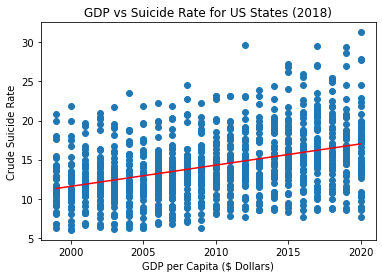

In [30]:
plt.scatter(x_values, y_values)
plt.annotate(line_eq, (35000, 10.0), fontsize = 15, color = 'Red')
plt.plot(x_values, regress_values, "r-")
plt.xlabel("Year")
plt.ylabel("Crude Suicide Rate")
plt.title("GDP vs Suicide Rate for US States per year")
plt.show

In [31]:
correlation = st.pearsonr(x_values, y_values)
print(correlation)

# print(f"The correlation between GDP per Capita and Crude suicide rate for US states in 2018 is {(correlation)}")

(0.41155041054338337, 3.3029915136273997e-46)
